In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfdf

In [2]:
dataset,dataset_info = tfdf.load('malaria',with_info=True)

In [3]:
dataset

{'train': <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [4]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/Users/asthamishra/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin b

In [5]:
for data in dataset['train']:
    print(data)
    break

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}


In [6]:
for data in dataset[0].take(4):
    print(data)

KeyError: 0

In [7]:
dataset,dataset_info = tfdf.load('malaria',with_info=True, as_supervised = True,split=['train'],shuffle_files=True)

In [8]:
for data in dataset[0].take(4):
    print(data)

(<tf.Tensor: shape=(151, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(121, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [9]:
d=tf.data.Dataset.range(10)
list(d.as_numpy_iterator())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
d=tf.data.Dataset.range(10)
d=d.take(6)
list(d.as_numpy_iterator())

[0, 1, 2, 3, 4, 5]

In [11]:
d=tf.data.Dataset.range(10)
d=d.skip(6)
list(d.as_numpy_iterator())

[6, 7, 8, 9]

In [12]:
Train_Ratio=0.6
Val_Ratio=0.2
Test_Ratio=0.2
d=tf.data.Dataset.range(10)
print(list(d.as_numpy_iterator()))
d_size=len(d)
train_d = d.take(int(Train_Ratio * d_size))
print(list(train_d.as_numpy_iterator()))
val_test_d = d.skip(int(Train_Ratio * d_size))
val_d = val_test_d.take(int(Val_Ratio * d_size))
print(list(val_d.as_numpy_iterator()))
test_d=val_test_d.skip(int(Val_Ratio*d_size))
print(list(test_d.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5]
[6, 7]
[8, 9]


In [13]:
dataset, dataset_info = tfdf.load('malaria', with_info=True,
                                  as_supervised=True, 
                                  shuffle_files = True, 
                                  split=['train'])

In [14]:
for data in dataset[0].take(1):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [15]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
  return train_dataset, val_dataset, test_dataset

In [16]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO )

In [17]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

# Data Visualization

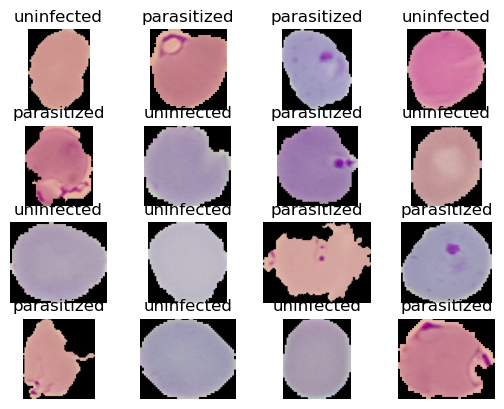

In [18]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i + 1)
  
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

# Data Preprocessing

In [19]:
# Resizing and Scaling of train dataset
def resize_and_rescale(image,label):
    return tf.image.resize(image,(224,224))/255,label

In [20]:
train_dataset=train_dataset.map(resize_and_rescale)
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [21]:
val_dataset=val_dataset.map(resize_and_rescale)
val_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [22]:
test_dataset=test_dataset.map(resize_and_rescale)
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [23]:
train_dataset=train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [24]:
val_dataset=val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [25]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization
model = tf.keras.Sequential([InputLayer(input_shape=(224,224,3)),
                           Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu'),
                           BatchNormalization(),
                           MaxPool2D(pool_size=2,strides=2),
                
                           Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu'),
                           BatchNormalization(),
                           MaxPool2D(pool_size=2,strides=2),
                             
                            
                           Flatten(),
                            
                           Dense(1000,activation='relu'),
                             BatchNormalization(),
                           Dense(100,activation='relu'),
                             BatchNormalization(),
                           Dense(1,activation='sigmoid'),
                            
                            ])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [27]:
y_true=[0,1,0,0]
y_pred=[0.6,0.7,0.8,0.94]
bce=tf.keras.losses.BinaryCrossentropy(from_logits=True)
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9703825>

In [28]:
y_true=[0,1,0,0]
y_pred=[0.6,0.7,0.8,0.94]
bce=tf.keras.losses.BinaryCrossentropy()
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.423953>

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
model.compile(optimizer=Adam(learning_rate=0.01),
             loss=BinaryCrossentropy(),
              metrics='accuracy'
             )

In [30]:
history=model.fit(train_dataset,validation_data=val_dataset,epochs=10,verbose=1)

Epoch 1/10
689/689 [==============================] - 296s 428ms/step - loss: 0.3495 - accuracy: 0.8479 - val_loss: 0.2041 - val_accuracy: 0.9238
Epoch 2/10
689/689 [==============================] - 242s 352ms/step - loss: 0.2143 - accuracy: 0.9246 - val_loss: 2.4273 - val_accuracy: 0.7525
Epoch 3/10
689/689 [==============================] - 249s 361ms/step - loss: 0.1853 - accuracy: 0.9370 - val_loss: 0.7390 - val_accuracy: 0.5314
Epoch 4/10
689/689 [==============================] - 246s 357ms/step - loss: 0.1700 - accuracy: 0.9420 - val_loss: 0.3408 - val_accuracy: 0.8748
Epoch 5/10
689/689 [==============================] - 328s 476ms/step - loss: 0.1614 - accuracy: 0.9455 - val_loss: 0.2774 - val_accuracy: 0.9278
Epoch 6/10
689/689 [==============================] - 302s 438ms/step - loss: 0.1492 - accuracy: 0.9507 - val_loss: 0.2024 - val_accuracy: 0.9456
Epoch 7/10
689/689 [==============================] - 298s 432ms/step - loss: 0.1411 - accuracy: 0.9527 - val_loss: 0.4752 -

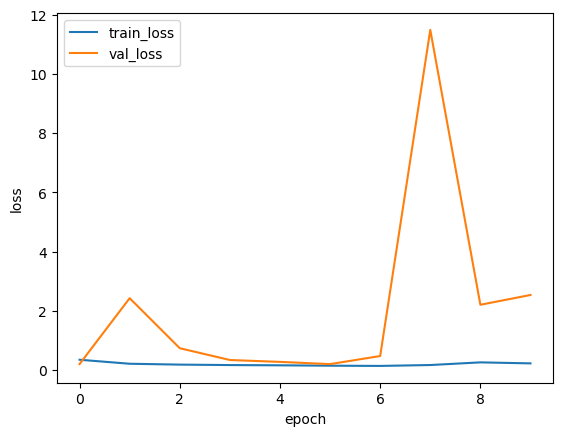

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

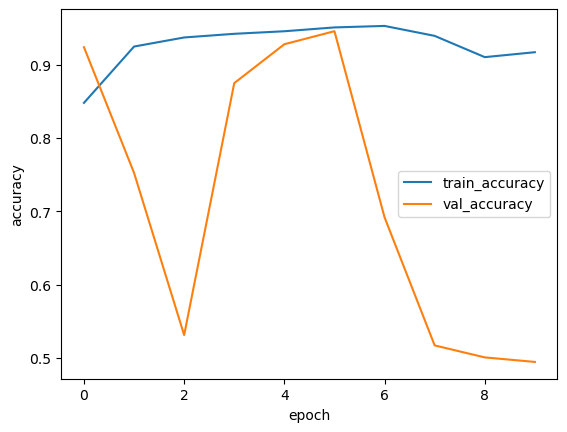

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [33]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [34]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [35]:
test_dataset=test_dataset.batch(1)
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [36]:
model.evaluate(test_dataset)

2757/2757 [==============================] - 38s 13ms/step - loss: 2.5387 - accuracy: 0.5140


[2.5386674404144287, 0.5139644742012024]

In [37]:
model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 3s 3s/step


0.0016633921

In [38]:
def parasite_or_not(x):
    if(x<0.5):
        return str('P')
    else:
        return str('U')

In [43]:
parasite_or_not(model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 2s 2s/step


'P'

1/1 [==============================] - 0s 17ms/step


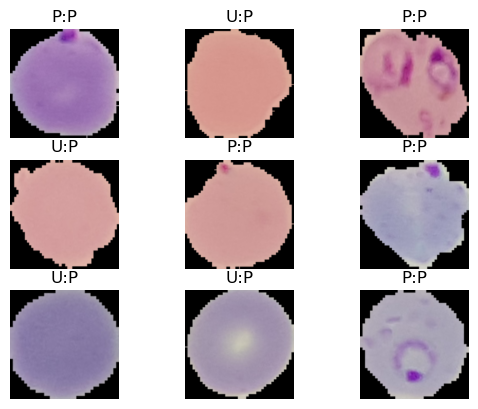

In [45]:
for i,(image,label) in enumerate(test_dataset.take(9)):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image[0])
    plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(model.predict(image)[0][0])))
    plt.axis("off")